Pandas and Seaborn
Using the wine dataset from Kaggle

In [60]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Import data
name = 'winemag.csv'
df1 = pd.read_csv(name)

In [3]:
df1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [61]:
#Remove unnecessary columns
df1.drop(labels = 'Unnamed: 0', axis = 1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [35]:
#Understand which countries have enough records to include in the 

temp1 = df1.groupby('country').points.count().sort_values(ascending = False)
countries = pd.DataFrame({'country': temp1.index, 'count': temp1.values})
criteria = countries['count'] > 500
countries['criteria'] = criteria
countries.head()

,country,count,criteria
0,US,62397,True
1,Italy,23478,True
2,France,21098,True
3,Spain,8268,True
4,Chile,5816,True


In [50]:
df3 = pd.merge(df1,countries,on = 'country')
df4 = df3.drop(labels = ['Unnamed: 0','count'], axis = 1)
df4 = df4[df4['criteria']]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149568 entries, 0 to 150293
Data columns (total 11 columns):
country        149568 non-null object
description    149568 non-null object
designation    104176 non-null object
points         149568 non-null int64
price          135910 non-null float64
province       149568 non-null object
region_1       125674 non-null object
region_2       60953 non-null object
variety        149568 non-null object
winery         149568 non-null object
criteria       149568 non-null bool
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [57]:
sorting = df4.groupby('country').points.median().sort_values(ascending = False).index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

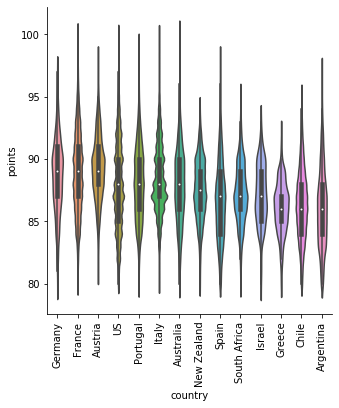

In [59]:
sns.catplot(x = 'country', y = 'points', data = df4, kind = 'violin', order = sorting)
plt.xticks(rotation = 90)